In [1]:
%matplotlib inline

In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install quaternionic

     |████████████████████████████████| 148 kB 8.4 MB/s 
     |████████████████████████████████| 743 kB 49.3 MB/s 
     |████████████████████████████████| 745 kB 49.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [6]:
from projects.rkhs_lifting.src.mesh.midpoint_refinement import Midpoint_Refinement

# Test constuctor
h = np.pi/10
MP_mesh = Midpoint_Refinement(h=h)

# TODO Do this once more if we have the integrators complete and do it for the icosahedron!!!

0.5705941324332322
1.0


Number of angles = 14761


/usr/local/lib/python3.7/dist-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


Text(0.5, 0, '$\\psi$')

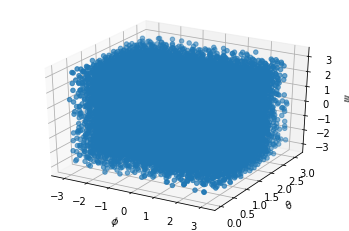

In [7]:
import quaternionic
from scipy.spatial.transform import Rotation as R


# Plot meshed points

quats = quaternionic.array(np.roll(MP_mesh.verts,-1,axis=-1)).normalized.ndarray
points = R.from_quat(quats)
angles = points.as_euler("ZYZ")

x = angles[:, 0]
y = angles[:, 1]
z = angles[:, 2]
print("Number of angles = {}".format(len(x)))

fig = plt.figure()
ax = fig.gca(projection='3d')

img = ax.scatter(x, y, z)
ax.set_xlabel("$\phi$")
ax.set_ylabel("$\\theta$")
ax.set_zlabel("$\psi$")
